<a href="https://colab.research.google.com/github/EdSang24/Week2-Machine-Learning/blob/main/Edward_Sang_Week_2_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Defining the Question**

**a)Research Question**

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

**b)Specifying the Question**

To figure out which factors affect housing prices in real estate properties and how each relevant factor has in predicting the price.

**c)Defining the Metrics of Success**

We will focus on training different regression models for predicting the prices and choose the best model to go with. To achieve these, we will define our predictor variables and our target variable which is the house price. We will consider our best regession model with an accuracy of 65% and above.

**d)Understanding the context**

Our dataset consists of different real estate properties with a variety of factors that affect the pricing of the houses creating a demand for the business to predict the prices accurately.

 **e)Experimental Design**

The workflow will look like this;
*   Data preparation and Cleaning
    * Loading of libraries and dataset
    * Dealing with missing values 
    * Dealing with duplicates
    * Checking for outliers
*   Performing Exploratory Data Analysis
    * Univariate analysis
    * Bivariate analysis
*   Creating our Multiple Linear Regression model.
*   Checking for Multicollinearity
*   Creating a Residual plot
*   Checking for heteroskedacity
*   Quantile Regression 
*   Ridge Regression
*   Lasso Regression
*   Elastic Net Regression
*   Conclusion


**f)Data Relevance**

The dataset used can be found on this link-http://bit.ly/IndependentProjectWeek7Dataset

**Data description**

*   Id
*   price  - Price of the house
*  bedrooms - Number of Bedrooms
* bathrooms - Number of Bathrooms 
* sqft_living - Square feet area of living area 
*   sqft_lot  - Square feet area of parking Layout
*  floors - Number of Floors
*   waterfront - Whether waterfront is there or not
*   view - Number of Views
*   grade - Grades
*   sqft_above
*   sqft_basement - Square feet area off basement
*   yr_built - Year the house is built
*   yr_renovated - Year the house is renovated
*   zipcode - zipcode os the house
*   lat : Latitude of the house
*   lon : Longitude of the house
*   sqft_living15
*   sqft_lot15


In [2]:
# Importing our libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Loading our dataset

df=pd.read_csv('/content/Independent Project Week 7 - house_data.csv')
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Data Exploration

In [4]:
# Determining the number of records
df.shape

(21613, 20)

In [5]:
# Previewing the top records in our dataset
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# Previewing the bottom records in our dataset
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [7]:
# Checking whether each column has an appropriate datatype

df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# Checking the Dataset

In [8]:
# Checking for missing values

df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values

In [9]:
# Cheking for duplicates

df.duplicated().sum()

3

In [10]:
# Dropping the duplicate values

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# Tyding the Dataset

In [11]:
# Droppping the columns we don't need for our analysis

df.drop(['id', 'zipcode', 'lat', 'long'], axis = 1, inplace = True)

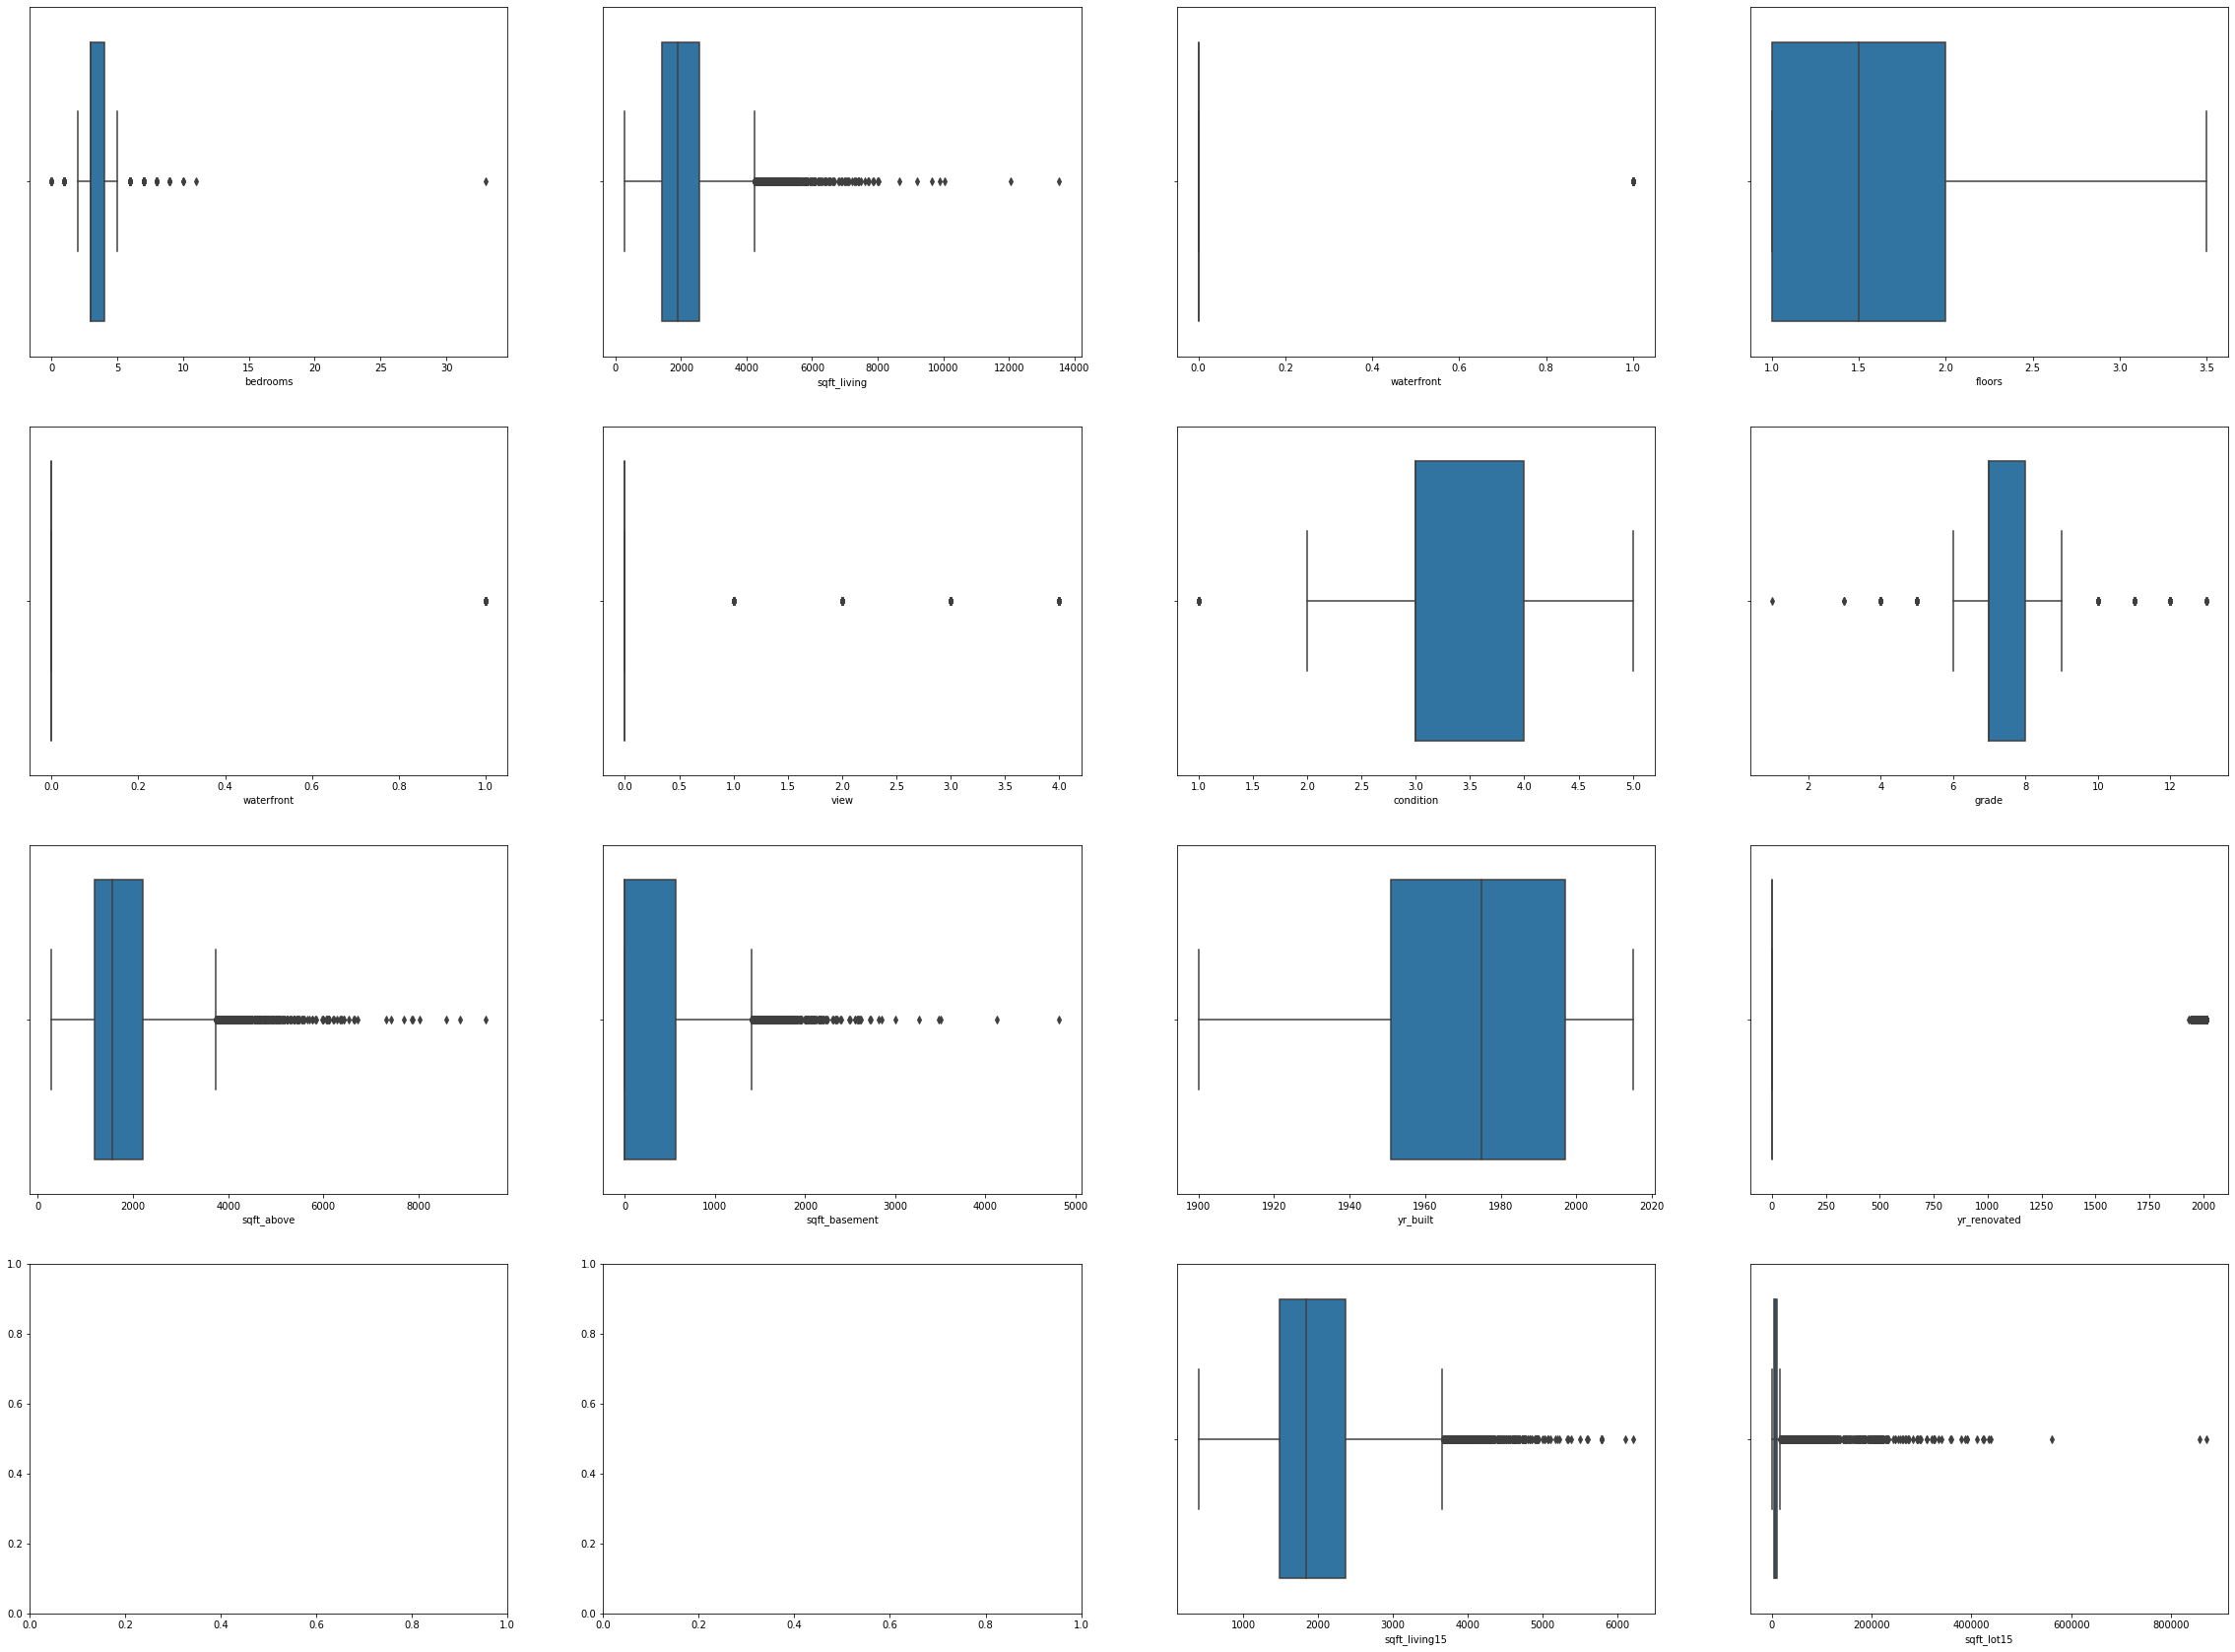

In [12]:
# Checking for outliers

f, axes = plt.subplots(4,4, figsize=(40,30))
sns.boxplot(data=df,x='bedrooms', ax=axes[0,0])
sns.boxplot(data=df,x='sqft_living', ax=axes[0,1])
sns.boxplot(data=df,x='waterfront', ax=axes[0,2])
sns.boxplot(data=df,x='floors', ax=axes[0,3])
sns.boxplot(data=df,x='waterfront', ax=axes[1,0])
sns.boxplot(data=df,x='view', ax=axes[1,1])
sns.boxplot(data=df,x='condition', ax=axes[1,2])
sns.boxplot(data=df,x='grade', ax=axes[1,3])
sns.boxplot(data=df,x='sqft_above', ax=axes[2,0])
sns.boxplot(data=df,x='sqft_basement', ax=axes[2,1])
sns.boxplot(data=df,x='yr_built', ax=axes[2,2])
sns.boxplot(data=df,x='yr_renovated', ax=axes[2,3])
sns.boxplot(data=df,x='sqft_living15', ax=axes[3,2])
sns.boxplot(data=df,x='sqft_lot15', ax=axes[3,3])

There are a lot of outliers on most columns. This could be due to the various considerations for each house so that the price of the house can increase.

# Exploratoy Data Analysis

**Univariate Visualizations**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

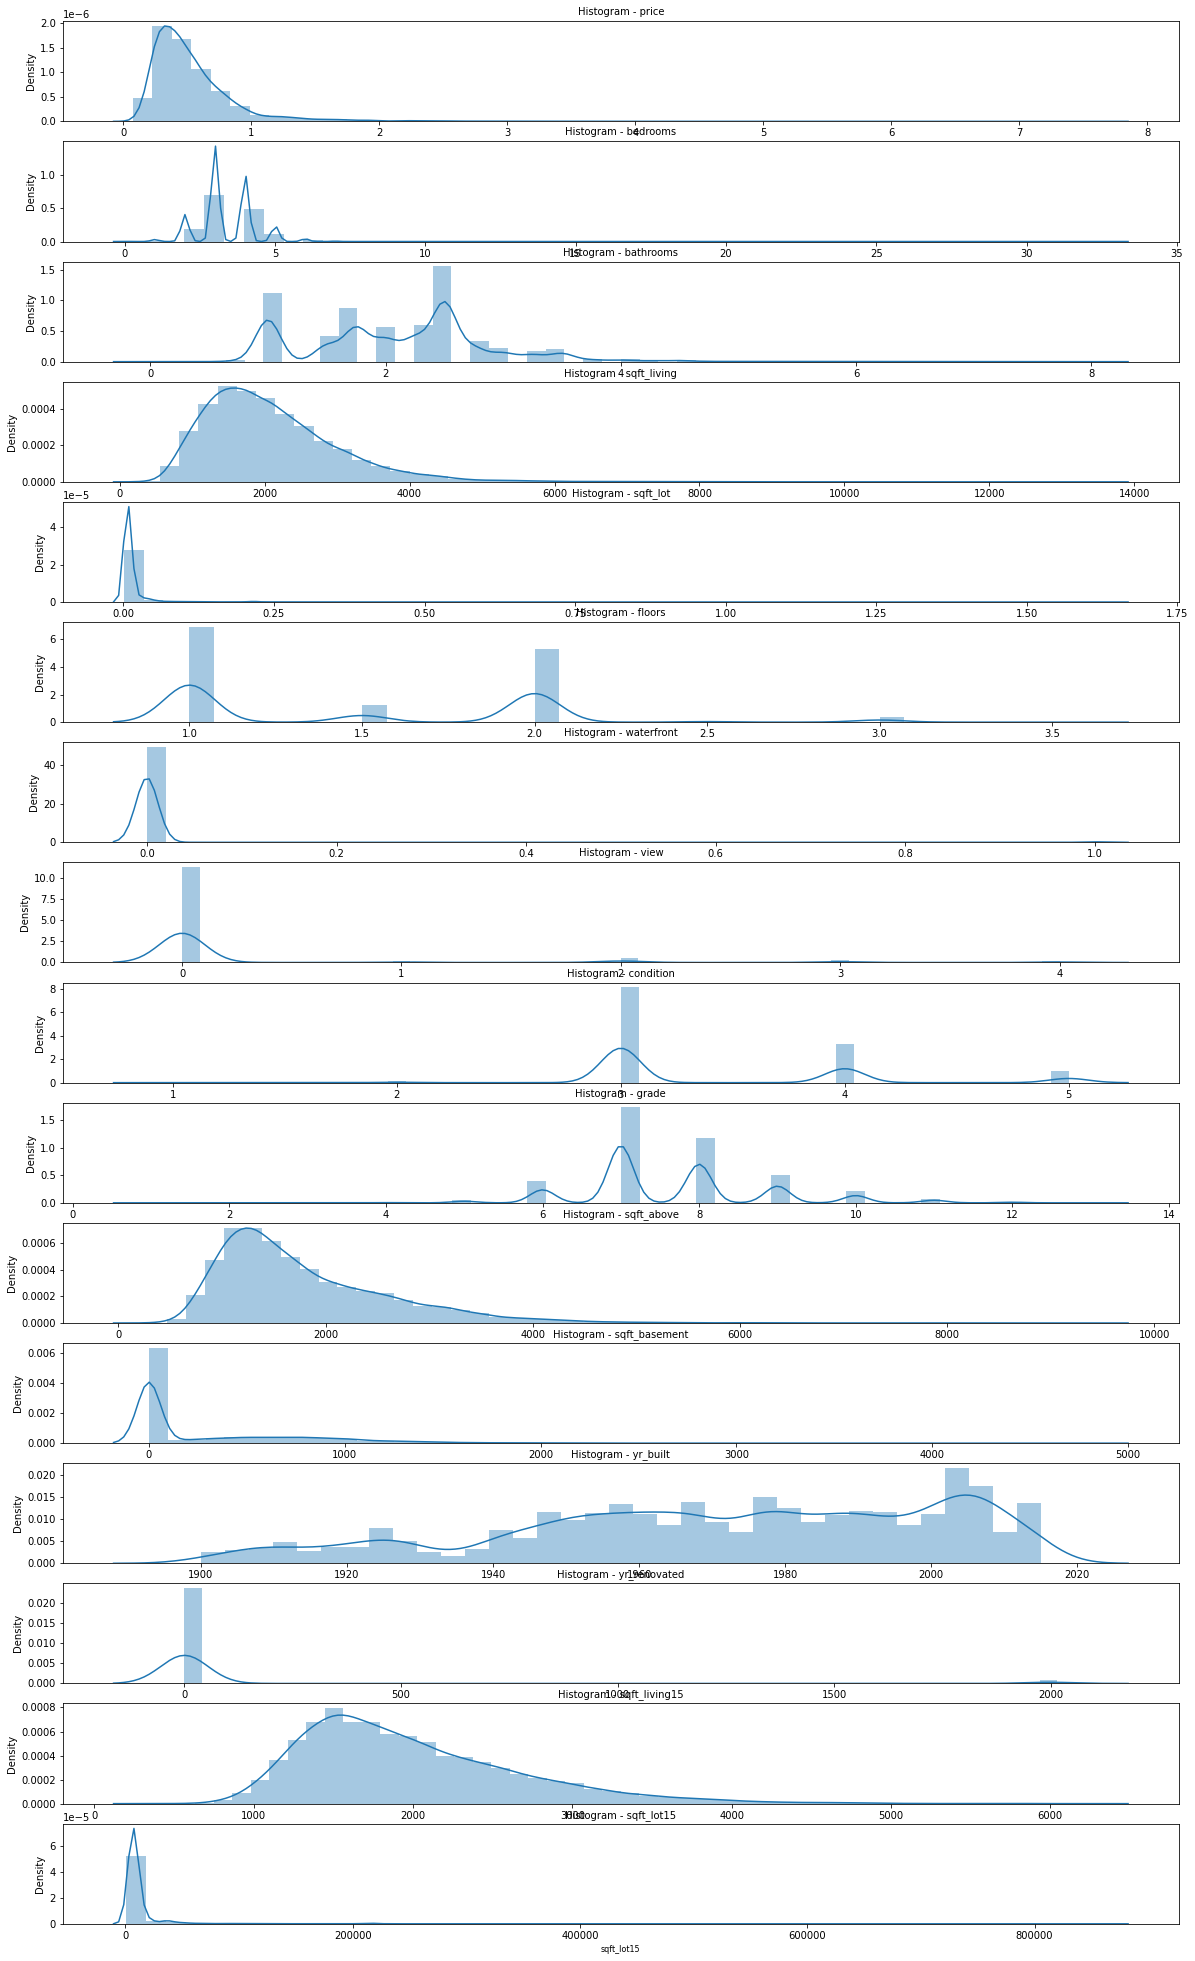

In [13]:
col_names = df.columns

fig, ax = plt.subplots(len(col_names), figsize=(20,35))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val],hist = True, ax=ax[i])
    ax[i].set_title('Histogram - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

**Bivariate Analysis**

Text(0.5, 1.0, 'Prices vs Number of Bedrooms')

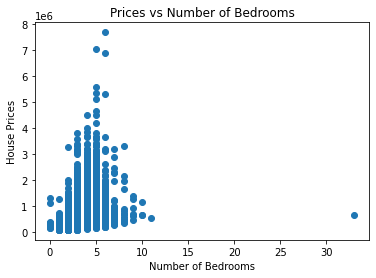

In [14]:
# checking the relationship of the price and the number of bedrooms
plt.scatter(df['bedrooms'], df['price'])
plt.ylabel('House Prices')
plt.xlabel('Number of Bedrooms')
plt.title('Prices vs Number of Bedrooms')

There is an increase in the price of houses as the bedrooms upto 6 rooms then the price start decreasing with more bedrooms.

Text(0.5, 1.0, 'Prices vs Number of Bathrooms')

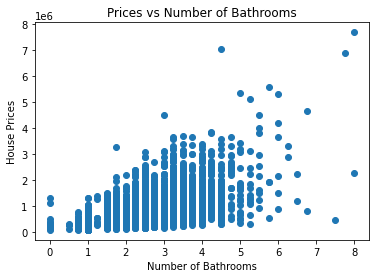

In [15]:
# checking the relationship between price and number of bathrooms
plt.scatter(df['bathrooms'], df['price'])
plt.ylabel('House Prices')
plt.xlabel('Number of Bathrooms')
plt.title('Prices vs Number of Bathrooms')

The more the number of bathrooms the more the price.

Text(0.5, 1.0, 'price vs sqft_living')

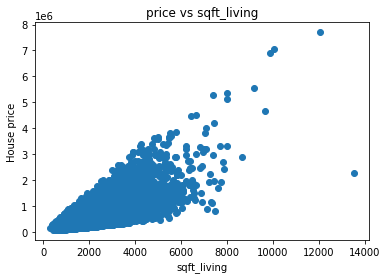

In [16]:
# checking the relation between the price and the square feet area of living area
plt.scatter(df["sqft_living"],df["price"])
plt.ylabel("House price")
plt.xlabel("sqft_living")
plt.title("price vs sqft_living")

An increase in the square feet area of living area increases the price of the house.

Text(0.5, 1.0, 'Price vs Year the house is built')

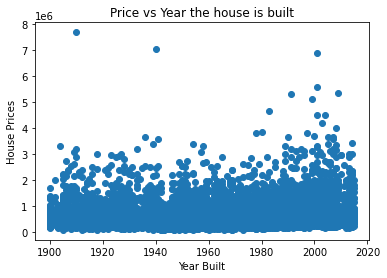

In [17]:
# checking the relation betweenthe price and  the year the house was built
plt.scatter(df['yr_built'], df['price'])
plt.ylabel('House Prices')
plt.xlabel('Year Built')
plt.title('Price vs Year the house is built')

Text(0.5, 1.0, 'Prices vs Year the house is renovated')

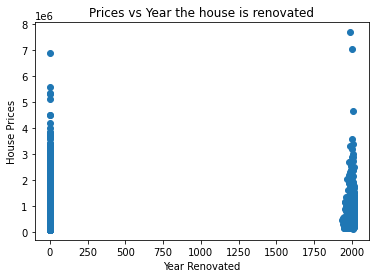

In [18]:
# checking the relationship between the price and the year the house is renovated
plt.scatter(df['yr_renovated'], df['price'])
plt.ylabel('House Prices')
plt.xlabel('Year Renovated')
plt.title('Prices vs Year the house is renovated')

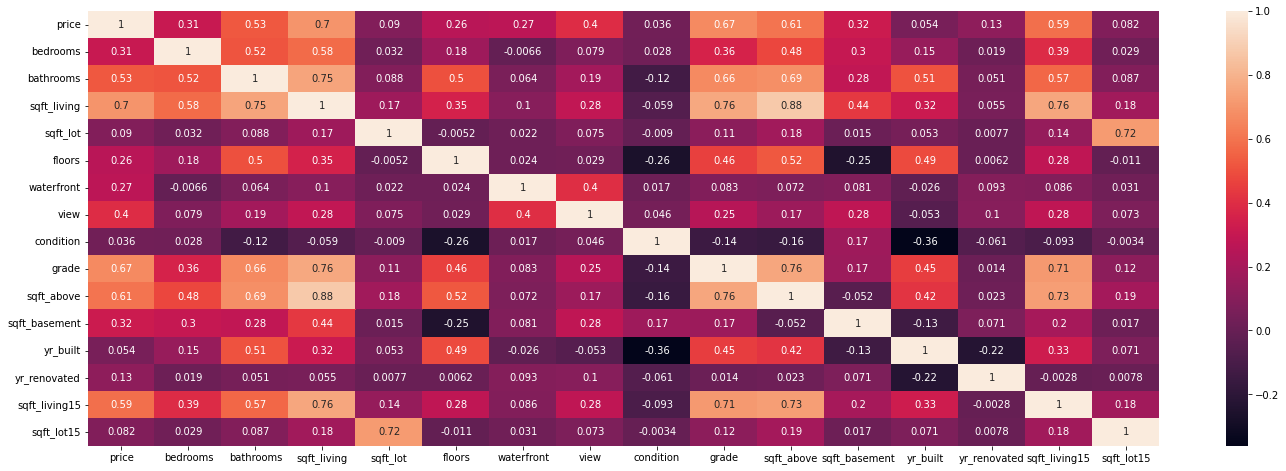

In [19]:
#plotting a heatmap
plt.figure(figsize=(24,8))
sns.heatmap(df.corr(), xticklabels = df.corr().columns.values, yticklabels = df.corr().columns.values, annot = True)
plt.show()

# Multiple Linear Regession

In [20]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X=df.iloc[:, 1:-1].values
y=df['price'].values

# Creating train and test set using 80% as our training set and the remaining 20% as our test set

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size= .2, random_state=0)

regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [22]:
# Predicting our prices.

y_pred=regressor.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'predicted': y_pred.flatten()})
comparison_frame.describe()

,Actual,predicted
count,4.322000e+03,4.322000e+03
mean,5.434344e+05,5.396101e+05
std,3.625612e+05,3.025510e+05
min,8.100000e+04,-5.708765e+05
25%,3.230000e+05,3.369071e+05
50%,4.500000e+05,4.729491e+05
75%,6.500000e+05,6.723438e+05
max,4.000000e+06,2.359593e+06


In [23]:
# evaluating the algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 139476.28498299886
Mean Squared Error: 44431958151.00218
Root Mean Squared Error: 210788.89475255136


In [24]:
# Checking the accuracy of our model.

model=LinearRegression()

#carrying out the training 
model.fit(X_train,y_train)
print('Model Accuracy:',model.score(X_test,y_test))

Model Accuracy: 0.6619091877001437


The model has an accuracy of 66%

**Multicollinearity**

In [25]:
#creating our independent variable and dependent variable
independent =df.drop(['price'], axis=1)

In [26]:
#using correlation between the variables to find VIF score

correlations = independent.corr()
correlations
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
bedrooms,1.644186,-0.461011,2.706633e-01,0.044586,0.070643,0.061394,0.117541,-0.064963,0.326244,-1.134522e+00,-6.043237e-01,0.092827,0.039971,0.012496,0.082130
bathrooms,-0.461011,3.348329,-9.895154e-01,-0.019162,-0.681763,0.009537,-0.039280,-0.136581,-0.288261,-3.370606e-01,-6.236948e-01,-0.916321,-0.258046,0.095868,0.076591
sqft_living,0.286755,-0.936076,2.303534e+14,-0.231842,0.098110,0.332513,-1.007043,-0.343069,2.578512,-2.076913e+14,-1.110001e+14,-1.009907,-0.005744,2.500725,0.381342
sqft_lot,0.044586,-0.019162,-2.286181e-01,2.088118,0.074213,0.028246,-0.051996,0.019147,-0.006197,-2.922623e-02,8.908383e-02,0.026133,0.012442,0.127176,-1.474744
floors,0.070643,-0.681763,6.887369e-02,0.074213,1.931962,-0.003969,-0.062789,0.132884,-0.326805,-4.980222e-01,5.304575e-01,-0.301452,-0.056955,0.358992,0.101144
waterfront,0.061394,0.009537,3.300264e-01,0.028246,-0.003969,1.203300,-0.493571,-0.015267,0.047955,-4.074658e-01,-1.626353e-01,-0.021977,-0.066202,0.057239,-0.016950
view,0.117541,-0.039280,-1.006265e+00,-0.051996,-0.062789,-0.493571,1.404335,-0.008112,-0.184309,9.556584e-01,2.141654e-01,0.198983,-0.034075,-0.264061,0.001992
condition,-0.064963,-0.136581,-3.477882e-01,0.019147,0.132884,-0.015267,-0.008112,1.221674,-0.016480,3.447897e-01,9.565706e-02,0.472734,0.195040,0.036100,-0.037930
grade,0.326244,-0.288261,2.614189e+00,-0.006197,-0.326805,0.047955,-0.184309,-0.016480,3.234547,-3.839044e+00,-1.814182e+00,-0.397166,-0.040833,-0.828842,0.120046
sqft_above,-1.143987,-0.414646,-2.076913e+14,-0.026211,-0.525829,-0.409340,0.954559,0.341316,-3.807164,1.872588e+14,1.000800e+14,1.257235,-0.017201,-3.865618,-0.557679


In [27]:
# dropping the sqft_basement sqft_above since it has a high VIF score
df.drop(['sqft_basement', 'sqft_above'], axis = 1, inplace=True)

# **Residual Plots**

In [28]:
# We now create the residual by substracting the test value from the predicted value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

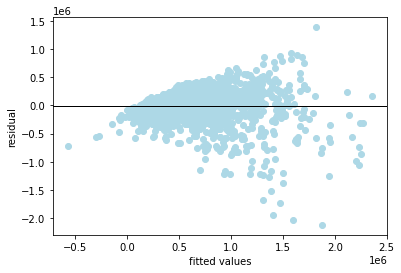

In [29]:
# Plotting our residuals

plt.scatter(y_pred, residuals, color='lightblue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black', linewidth=1)
plt.show()

We can see that the residuals are centered around the mean zero. There seems to be a constant variance in our plot, to affirm this we will perform a heteroskedacity test.

**Heteroskedacity Test**

In [30]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test result is greater than the critical value, the variance is not constant, meaning the existence of patterns in the variance 
# and the variance is heterogenous.

# If the test result is less than the critical value, the variance is constant and no patterns exist, meaning that the variance
# in our data is homogeneous.

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


The test concludes that our variance is constant

# **Quantile Regession**

In [31]:
# Splitting the features and the target variable
X = df.drop(['price', 'yr_renovated'], axis = 1)
y = df['price']

In [32]:
# Splitting the the train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 25)

In [33]:
# We will use the python package statsmodels for Quantile Regression

import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
model = smf.quantreg('y~X',df)
res = model.fit(q=.5)
print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3963
Model:                       QuantReg   Bandwidth:                   2.416e+04
Method:                 Least Squares   Sparsity:                    3.433e+05
Date:                Mon, 14 Feb 2022   No. Observations:                21610
Time:                        06:08:33   Df Residuals:                    21597
                                        Df Model:                           12
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.681e+06   1.03e+05     45.279      0.000    4.48e+06    4.88e+06
X[0]       -2.618e+04   1609.299    -16.265      0.000   -2.93e+04    -2.3e+04
X[1]        2.222e+04   2712.667      8.192      0.000    1.69e+04    2.75e+04
X[2]         103.0313      2.844     36.228      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


The accuracy of Quantile Regression model is 39% which is less than the accuracy of the Multiple linear regression which was 66%

# **Ridge Regression**

In [34]:
# Splitting the features and the target variable
X = df.drop(['price', 'yr_renovated'], axis = 1)
y = df['price']


In [35]:
# Splitting the the train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 25)

In [36]:
# we perform crossvalidation over a range of values which then finds different parameters
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge, param_grid={"alpha":np.logspace(-2,12,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [37]:
# finding the best fit parameter from our model

import warnings
warnings.filterwarnings('ignore')

search.fit(X,y)
print(search.best_params_)


{'alpha': 0.01}


In [40]:
from sklearn.metrics import mean_squared_error

# Fitting the model with our alpha value.

ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
y_pred=ridge.predict(X)
print("Ridge MSE:", mean_squared_error(y,y_pred))

Ridge MSE: 46752372351.50728


In [41]:
#Checking the accuracy:
print("Accuracy:",ridge.score(X_test, y_test )* 100)

Accuracy: 65.84496574429485


For our Ridge model, the accuracy is 66% which is the same as the Linear Regression 

# **Lasso Regression**

In [42]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model


# Splitting the features and the target variable
X = df.drop(['price', 'yr_renovated'], axis = 1)
y = df['price']

# Splitting the the train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 25)

In [43]:
#building our model
model=Lasso(normalize=True)
search=GridSearchCV(model,param_grid={"alpha":np.concatenate((np.arange(-2,6,4),np.arange(2,8,0.5)))},cv=10)

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
search.fit(X_train, y_train) 

print("Lasso best parameters:", search.best_params_)

Lasso best parameters: {'alpha': 7.0}


In [44]:
# Creating lasso regression with alpha value of 7
model=Lasso(alpha= 7,normalize=True)
model.fit(X,y)
y_pred=model.predict(X_test)
print("Lasso MSE:", mean_squared_error(y_test,y_pred))

Lasso MSE: 43418213866.43771


In [45]:
#Checking the accuracy:
print("Accuracy:",model.score(X_test, y_test )* 100)

Accuracy: 65.8567940675963


Our lasso model has an accuracy of 66% which is the same as our linear model.

# **Elastic Net Regression**

In [49]:
# Splitting the features and the target variable
X = df.drop(['price', 'yr_renovated'], axis = 1)
y = df['price']

# Splitting to train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 25)


In [62]:
from sklearn.linear_model import ElasticNet

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-4,10,12),'l1_ratio':[0.5,0.3,0.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [63]:
# We will now fit our model and display the best parameters and the best results we can get.
 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

print("Elastic net best parameters:", search.best_params_)

Elastic net best parameters: {'alpha': 0.0001, 'l1_ratio': 0.8}


Our alpha value is 0.0001 and our l1 ratio is 0.8

In [64]:
# Creating lasso regression with alpha value of 0.0001

elastic=ElasticNet(normalize=True,alpha= 0.0001,l1_ratio=0.8)
elastic.fit(X,y)
y_pred=elastic.predict(X)
print("Elastic Net MSE:", mean_squared_error(y,y_pred))

Elastic Net MSE: 51781586229.95593


In [65]:
# Checking the accuracy:

print("Accuracy:",elastic.score(X_test, y_test )* 100)

Accuracy: 62.07519316715954


Our model has an accuracy of 62% which is lower 

**Conclusion**

From our analysis; 
1.   We find there is strong multicollinearity between the variables.
2.   The Lasso and Ridge Regression models have high accuracy predictions of 66%

If we are looking for the best predictions, then Ridge regression is the best model to use. If we are looking for interpretability so that we can have a better understanding of the underlying data, then Elastic Net may be the best model to use.

